In [1]:
# importamos librerias varias
import pandas as pd
from multiprocessing import Pool
from pandas_ods_reader import read_ods
import glob

In [2]:
%%time
# Cargamos desde los pickles
salientes = pd.read_pickle('salientes_01.pkl')
entrantes = pd.read_pickle('entrantes_01.pkl')

CPU times: user 143 ms, sys: 191 ms, total: 334 ms
Wall time: 369 ms


In [3]:
#salientes.sample(20)

In [4]:
salientes.info

<bound method DataFrame.info of          llamantes          destino     llamado          fecha-hora   duracion
0       1132658418  Tráfico incluid   320509576 2023-09-13 00:00:00      67839
1       1167935609   Conexion Movil   263086005 2023-09-13 00:00:00  107449708
2       1169200429  Tráfico incluid   318849629 2023-09-13 00:00:00     794136
3       1126429480   Conexión Móvil   311835802 2023-09-13 00:00:01       2881
4       1137834970   Conexión Móvil   219224765 2023-09-13 00:00:02       2417
...            ...              ...         ...                 ...        ...
168558  2204715158      LLAM. LOCAL  1151514315 2023-08-17 23:59:58          2
168559  1122414019   Conexion Movil  2702115002 2023-08-18 00:00:00   27374385
168560  1126314023   Conexion Movil   476812028 2023-08-18 00:00:00    7798686
168561  1133381500  WhatsApp Gratis   286956146 2023-08-18 00:00:00        386
168562  1162178593   Conexión Móvil   911643305 2023-08-18 00:00:00        230

[6986719 rows x 5 c

In [5]:
entrantes.sample(10)

,llamado,llamantes,fecha-hora,duracion
4265,1121712197,1166183504,2023-08-25 13:34:53,50
306,1136264378,1126875291,2023-08-31 06:14:34,3
7729,1166858185,1164358522,2023-08-15 18:19:30,631
9507,1135037569,1124780218,2023-09-13 20:24:56,2
1800,1168292612,1167103626,2023-08-27 11:59:48,4
4256,1127300109,1161207283,2023-08-12 13:06:03,3
3663,1121689662,1169548918,2023-08-25 12:47:35,38
6710,1121580452,1136233103,2023-09-05 17:15:25,33
2581,1127300109,1161207283,2023-08-13 11:52:19,2
2456,1135224703,1125057213,2023-09-03 13:53:40,42


In [6]:
entrantes.info

<bound method DataFrame.info of          llamado   llamantes          fecha-hora  duracion
0     1132919966  1125165253 2023-09-13 00:00:08        20
1     1127338206  1130115308 2023-09-13 00:00:27        15
2     1156432989  1144308338 2023-09-13 00:00:39      1868
3     1160231027  1137793286 2023-09-13 00:00:53      3261
4     1157360230  1126348825 2023-09-13 00:01:55        35
...          ...         ...                 ...       ...
9826  1130663833  1130808443 2023-08-17 23:54:09        18
9827  1164866429  1165310937 2023-08-17 23:56:12         7
9828  1166654279  1158382503 2023-08-17 23:56:36        43
9829  1132837127  1159091388 2023-08-17 23:57:41       254
9830  1150601346  1153471524 2023-08-17 23:58:59        38

[402632 rows x 4 columns]>

In [7]:
# sacamos un listado de telefonos y la cantidad de cada uno
resumen_llamantes = salientes['llamantes'].value_counts()
resumen_llamantes

1151467918    79226
1145635562    70662
1165409227    48861
1133294894    45722
1121765241    42413
              ...  
2291501888        1
1154181869        1
1176115172        1
1158764385        1
1121804490        1
Name: llamantes, Length: 69414, dtype: int64

In [8]:
# Convertimos lo anterior a un dataframe
# resumen_salientes = salientes.value_counts().rename_axis('telefonos').reset_index(name='llamadas')
# resumen_salientes = salientes.value_counts().rename_axis('telefonos').to_frame('cantidad')
# resumen_salientes

value_counts = salientes['llamantes'].value_counts(dropna=True, sort=True)

estadistica_salientes = pd.DataFrame(value_counts)
estadistica_salientes_cero = estadistica_salientes.reset_index()
estadistica_salientes_cero.columns = ['llamantes', 'cantidad'] 

In [9]:
estadistica_salientes_cero

,llamantes,cantidad
0,1151467918,79226
1,1145635562,70662
2,1165409227,48861
3,1133294894,45722
4,1121765241,42413
...,...,...
69409,2291501888,1
69410,1154181869,1
69411,1176115172,1
69412,1158764385,1


In [10]:
# Convertimos lo anterior a un dataframe
# resumen_salientes = salientes.value_counts().rename_axis('telefonos').reset_index(name='llamadas')
# resumen_salientes = salientes.value_counts().rename_axis('telefonos').to_frame('cantidad')
# resumen_salientes

value_counts_ent = entrantes['llamado'].value_counts(dropna=True, sort=True)

estadistica_entrantes = pd.DataFrame(value_counts_ent)
estadistica_entrantes_cero = estadistica_entrantes.reset_index()
estadistica_entrantes_cero.columns = ['llamado', 'cantidad'] 

In [11]:
estadistica_entrantes_cero

,llamado,cantidad
0,1127300109,3856
1,1152507897,1746
2,1132909775,1072
3,1166378866,769
4,1130814571,672
...,...,...
36823,1127250709,1
36824,1127248141,1
36825,1126833439,1
36826,1132388306,1


<Axes: >

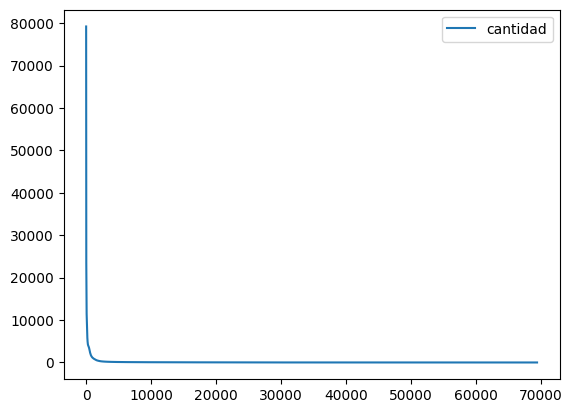

In [43]:
estadistica_salientes_cero.plot(y='cantidad', use_index=True)

<Axes: >

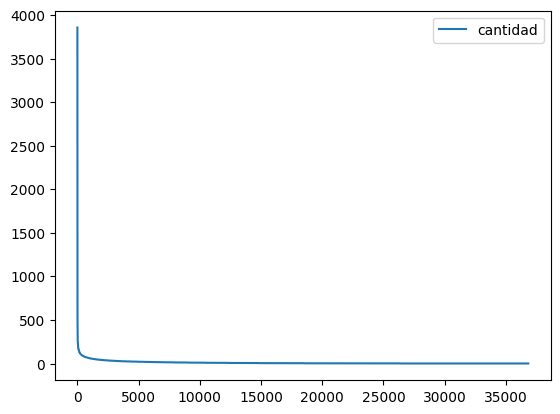

In [41]:
estadistica_entrantes_cero.plot(y='cantidad', use_index=True)

In [12]:
estadistica_salientes_cero['cantidad'].nunique()

1772

In [13]:
estadistica_salientes_cero[estadistica_salientes_cero['cantidad'] <= 4 ]['llamantes'].count() 

32680

In [14]:
estadistica_entrantes_cero[estadistica_entrantes_cero['cantidad'] <= 3 ]['llamado'].count() 

18315

In [15]:
# Filtrados en la data del hecho +- 20 minutos 07/09/2023 20;45
fil_sal_hecho_20 = salientes.loc[(salientes['fecha-hora'] >= '2023-09-07 20:25:00')
                     & (salientes['fecha-hora'] < '2023-09-07 21:05:00')]
fil_sal_hecho_20

,llamantes,destino,llamado,fecha-hora,duracion
131337,1121674689,Tráfico incluid,295523623,2023-09-07 20:25:00,76
131338,1132489070,Conexión Móvil,440585111,2023-09-07 20:25:00,373
131339,1121885821,Tráfico incluid,820,2023-09-07 20:25:02,618
131340,1138831912,Tráfico incluid,308714838,2023-09-07 20:25:02,390
131341,1158789838,Conexión Móvil,944849233,2023-09-07 20:25:02,152
...,...,...,...,...,...
137225,1127280754,Tráfico incluid,210723099,2023-09-07 21:04:58,2979882
137226,1133439623,Tráfico incluid,290502442,2023-09-07 21:04:58,132909
137227,1171085653,Conexion Movil,857611030,2023-09-07 21:04:58,0
137228,1127280754,WhatsApp Gratis,210723098,2023-09-07 21:04:59,5132


In [16]:
# Filtrados en la data del hecho +- 20 minutos 07/09/2023 20;45
fil_ent_hecho_20 = entrantes.loc[(entrantes['fecha-hora'] >= '2023-09-07 20:25:00')
                     & (entrantes['fecha-hora'] < '2023-09-07 21:05:00')]
fil_ent_hecho_20

,llamado,llamantes,fecha-hora,duracion
8936,1171128764,1136245412,2023-09-07 20:25:02,2
8937,1123841860,1150569808,2023-09-07 20:25:08,48
8938,1163249936,1169811935,2023-09-07 20:25:08,416
8939,1168306289,1168856025,2023-09-07 20:25:14,524
8940,1138556926,1144178577,2023-09-07 20:25:21,2142
...,...,...,...,...
9322,1133445321,1149407428,2023-09-07 21:03:38,239
9323,1138167541,1164802170,2023-09-07 21:04:01,3
9324,1161238219,1141716348,2023-09-07 21:04:25,2
9325,1155175470,1165553484,2023-09-07 21:04:33,44


In [17]:
# Filtrados en la data del hecho +- 5 minutos 07/09/2023 20;45
fil_sal_hecho_05 = salientes.loc[(salientes['fecha-hora'] >= '2023-09-07 20:40:00')
                     & (salientes['fecha-hora'] < '2023-09-07 20:50:00')]
fil_sal_hecho_05

,llamantes,destino,llamado,fecha-hora,duracion
133628,1132489070,Conexión Móvil,440595889,2023-09-07 20:40:00,41048
133629,1158786972,Conexión Móvil,944870711,2023-09-07 20:40:00,152
133630,1157437256,Conexión Móvil,440631879,2023-09-07 20:40:01,995
133631,1170451454,TRAFICO DATOS,288162957,2023-09-07 20:40:01,25462
133632,2204032111,Conexion Movil,6598025,2023-09-07 20:40:01,726992
...,...,...,...,...,...
135097,1137572120,Tráfico incluid,319440355,2023-09-07 20:49:59,11784
135098,1150108548,LLAM. LOCAL,1135616364,2023-09-07 20:49:59,124
135099,1170451454,Tráfico incluid,288175242,2023-09-07 20:49:59,1039
135100,1170451454,TRAFICO DATOS,288175243,2023-09-07 20:49:59,637


In [18]:
# Filtrados en la data del hecho +- 5 minutos 07/09/2023 20;45
fil_ent_hecho_05 = entrantes.loc[(entrantes['fecha-hora'] >= '2023-09-07 20:40:00')
                     & (entrantes['fecha-hora'] < '2023-09-07 20:50:00')]
fil_ent_hecho_05

,llamado,llamantes,fecha-hora,duracion
9091,1162951497,1128981431,2023-09-07 20:40:01,19
9092,1157335608,1154857242,2023-09-07 20:40:16,3
9093,1161807060,1171017234,2023-09-07 20:40:19,3
9094,1166668168,1128503225,2023-09-07 20:40:19,3
9095,1168292614,1157211754,2023-09-07 20:40:21,36
...,...,...,...,...
9198,1176101685,1128380177,2023-09-07 20:49:41,50
9199,1162137741,1138152009,2023-09-07 20:49:43,227
9200,1157662720,1161190634,2023-09-07 20:49:44,164
9201,1130677271,1150186617,2023-09-07 20:49:52,3


In [19]:
# Contamos la cantidad de numeros de telefonos unicos
salientes['llamantes'].nunique()

69414

In [20]:
salientes.describe()

,llamantes,llamado,duracion
count,6.986719e+06,6.986719e+06,6.986719e+06
mean,1.204228e+09,4.400622e+10,1.127213e+07
std,3.167989e+08,6.239795e+13,1.079167e+08
min,1.120120e+09,1.000000e+00,0.000000e+00
25%,1.132265e+09,2.539629e+08,4.400000e+02
50%,1.151468e+09,2.997480e+08,2.107000e+03
75%,1.162340e+09,8.297394e+08,2.684500e+04
max,4.910007e+09,1.153214e+17,1.073747e+10


In [21]:
print(max(salientes['fecha-hora']))

2023-09-14 00:00:00


In [22]:
print(min(salientes['fecha-hora']))

2023-08-07 00:00:01


In [23]:
print(salientes['destino'].unique())

['Tráfico incluid' 'Conexion Movil' 'Conexión Móvil' 'WhatsApp Gratis'
 'TRAFICO DATOS ' 'LLAM. LOCAL' 'LLAM.LOC.MOV.' 'SERV.CLIENTE' 'ASIST.RET'
 'ADELIA MARIA' 'LLAM. 0810' 'BUENOS AIRES' '500 KB Internet' 'ROSARIO'
 'ROA volteABREV' '*555' 'COMODORO RIVADA' 'LLAM.LOCAL' 'TRAFICO DATOS'
 'GM APN2 GM Exced' 'PERGAMINO' 'SAN JOSE FELICI' 'LLAM. 0800'
 'VILLA GESELL' 'Llamada Recib' 'JUAN MARIA GUTI' 'VICTORIA'
 'LLAM.LOC.MOV' 'CORDOBA' 'PUERTO RICO' 'GENERAL MADARIA' 'CAMPANA'
 'ANSES' 'CATAMARCA' 'VILLA DOLORES' 'SALTO' 'CONCEPCION TUC.'
 'CORRIENTES' 'SAN NICOLAS' 'FRIAS' 'GM APN2 INFOT Conf' 'MAR DE AJO'
 'POSADAS' 'FORMOSA' 'PUERTO IGUAZU' 'ELDORADO' 'ALCARAZ' 'SANTA FE'
 'MAR DEL PLATA' 'GENERAL VILLEGA' 'S MIGUEL DE TUC' 'CHIVILCOY'
 'LA PLATA' 'GUALEGUAY' 'ROQUE SAENZ PEÑ' 'GOYA' 'ORAN' 'SAN JUAN'
 'LINCOLN' 'SAN ANDRES DE G' 'MENDOZA' 'SANTO TOME' 'OBERA' 'ZARATE'
 'GM APN2 GM Conf' 'SUNCHO CORRAL' 'LA RIOJA' 'SAN PEDRO JUJUY' 'LA FALDA'
 'VENADO TUERTO' '*Numeros Amigos' 'LOBO

In [30]:
# Numero de destinos unicos
salientes['destino'].nunique()

333

En estadistica_entrantes_cero y estadistica_salientes_cero tengo los numeros y cuantos llamados hicieron/recibieron.  
Dacamos listas de numeros que tienen 2 o menos llamadas

In [24]:
# SALIENTES 20 minutos
# hacemos un df con los numeros que aparecen 2 veces o menos
df_sal_no_freq = estadistica_salientes_cero.loc[estadistica_salientes_cero['cantidad'] <= 2]
print(df_sal_no_freq)
# de ese def sacamos una lista con los numeros no frecuentes (son varios)
lst_sal_nfrq = df_sal_no_freq['llamantes'].values.tolist()
print(len(lst_sal_nfrq))
# de salientes elegimos los rows donde llamante esta en esa lista
salientes_nf = salientes[salientes['llamantes'].isin(lst_sal_nfrq)]
print(salientes_nf)
# ahora filtramos la ventana de 20 minutos
salientes_nf_20 = salientes_nf.loc[(salientes_nf['fecha-hora'] >= '2023-09-07 20:25:00')
                     & (salientes_nf['fecha-hora'] < '2023-09-07 21:05:00')]
print(salientes_nf_20)

        llamantes  cantidad
44039  1176145752         2
44040  1121741664         2
44041  1171354785         2
44042  1132626732         2
44043  2216258192         2
...           ...       ...
69409  2291501888         1
69410  1154181869         1
69411  1176115172         1
69412  1158764385         1
69413  1121804490         1

[25375 rows x 2 columns]
25375
         llamantes         destino     llamado          fecha-hora    duracion
293     1133078828  Conexion Movil   388515017 2023-09-13 00:01:59   630609082
360     1167175196  Conexion Movil   419412002 2023-09-13 00:02:25    16735380
463     1139073245  Conexion Movil     4769023 2023-09-13 00:03:33  1280277205
1284    1171094220  Conexion Movil  1789312018 2023-09-13 00:11:40    36227895
1377    1133597670  Conexion Movil  2412913006 2023-09-13 00:12:30    16821831
...            ...             ...         ...                 ...         ...
165947  1163025306     LLAM. LOCAL  1132515916 2023-08-17 23:32:57          36


In [25]:
salientes_nf_20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 131583 to 137221
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   llamantes   18 non-null     int64         
 1   destino     18 non-null     object        
 2   llamado     18 non-null     int64         
 3   fecha-hora  18 non-null     datetime64[ns]
 4   duracion    18 non-null     int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 864.0+ bytes


In [26]:
# SALIENTES 5 minutos
# hacemos un df con los numeros que aparecen 2 veces o menos
df_sal_no_freq = estadistica_salientes_cero.loc[estadistica_salientes_cero['cantidad'] <= 2]
print(df_sal_no_freq)
# de ese def sacamos una lista con los numeros no frecuentes (son varios)
lst_sal_nfrq = df_sal_no_freq['llamantes'].values.tolist()
print(len(lst_sal_nfrq))
# de salientes elegimos los rows donde llamante esta en esa lista
salientes_nf = salientes[salientes['llamantes'].isin(lst_sal_nfrq)]
print(salientes_nf)
# ahora filtramos la ventana de 20 minutos
salientes_nf_05 = salientes_nf.loc[(salientes_nf['fecha-hora'] >= '2023-09-07 20:40:00')
                     & (salientes_nf['fecha-hora'] < '2023-09-07 20:50:00')]
print(salientes_nf_05)

        llamantes  cantidad
44039  1176145752         2
44040  1121741664         2
44041  1171354785         2
44042  1132626732         2
44043  2216258192         2
...           ...       ...
69409  2291501888         1
69410  1154181869         1
69411  1176115172         1
69412  1158764385         1
69413  1121804490         1

[25375 rows x 2 columns]
25375
         llamantes         destino     llamado          fecha-hora    duracion
293     1133078828  Conexion Movil   388515017 2023-09-13 00:01:59   630609082
360     1167175196  Conexion Movil   419412002 2023-09-13 00:02:25    16735380
463     1139073245  Conexion Movil     4769023 2023-09-13 00:03:33  1280277205
1284    1171094220  Conexion Movil  1789312018 2023-09-13 00:11:40    36227895
1377    1133597670  Conexion Movil  2412913006 2023-09-13 00:12:30    16821831
...            ...             ...         ...                 ...         ...
165947  1163025306     LLAM. LOCAL  1132515916 2023-08-17 23:32:57          36


In [27]:
salientes_nf_05.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 134003 to 134966
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   llamantes   4 non-null      int64         
 1   destino     4 non-null      object        
 2   llamado     4 non-null      int64         
 3   fecha-hora  4 non-null      datetime64[ns]
 4   duracion    4 non-null      int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 192.0+ bytes


In [29]:
# Entrantes 20 minutos
# hacemos un df con los numeros que aparecen 2 veces o menos
df_ent_no_freq = estadistica_entrantes_cero.loc[estadistica_entrantes_cero['cantidad'] <= 2]
print(df_ent_no_freq)
# de ese def sacamos una lista con los numeros no frecuentes (son varios)
lst_ent_nfrq = df_ent_no_freq['llamado'].values.tolist()
print(len(lst_ent_nfrq))
# de salientes elegimos los rows donde llamante esta en esa lista
entrantes_nf = entrantes[entrantes['llamado'].isin(lst_ent_nfrq)]
print(entrantes_nf)
# ahora filtramos la ventana de 20 minutos
entrantes_nf_20 = entrantes_nf.loc[(entrantes_nf['fecha-hora'] >= '2023-09-07 20:25:00')
                     & (entrantes_nf['fecha-hora'] < '2023-09-07 21:05:00')]
print(entrantes_nf_20)

          llamado  cantidad
21274  1132612260         2
21275  1134209004         2
21276  1137891869         2
21277  3537581453         2
21278  1154010123         2
...           ...       ...
36823  1127250709         1
36824  1127248141         1
36825  1126833439         1
36826  1132388306         1
36827  1176202089         1

[15554 rows x 2 columns]
15554
         llamado   llamantes          fecha-hora  duracion
27    1139378534  1139542154 2023-09-13 00:17:50       359
116   1132403665  1134631453 2023-09-13 02:02:01        32
179   1160255780  1136008657 2023-09-13 04:58:18        17
181   1161361617  1122658453 2023-09-13 05:00:08         2
223   1158560410  1127062740 2023-09-13 05:46:48        40
...          ...         ...                 ...       ...
9604  1127194810  1166667203 2023-08-17 22:31:09       246
9649  1127415182  1138334556 2023-08-17 22:44:14        34
9698  1156452699  1153476660 2023-08-17 23:00:43        26
9788  1158369868  1132515916 2023-08-17 23

In [38]:
# Vamos a unificar todos los numeros en una sola lista
lista_numeros = salientes_nf_20['llamantes'].values.tolist() + entrantes_nf_20['llamado'].values.tolist()
lista_numeros_interes =  list(set(lista_numeros))
# Saco el numero que realiza una llamada a un servicio
lista_numeros_interes.remove(1157345937)
print(len(lista_numeros_interes))
#v = df.Parameter.value_counts()
#salientes[salientes['llamantes'].isin(resumen_llamantes.index[resumen_llamantes.lt(2)])]

32


In [39]:
lista_numeros_interes

[1157662720,
 1132441220,
 1164165900,
 1127975952,
 1123488404,
 1168441770,
 1136175661,
 1122747186,
 1160286644,
 1138863797,
 1127224501,
 1160363074,
 1131804484,
 1123841860,
 1133243077,
 1161234760,
 1162335309,
 1134883024,
 1144751313,
 1132626386,
 1137848153,
 1136542554,
 1161686108,
 1126860252,
 1156294118,
 1160191720,
 1155082345,
 1139252329,
 1168310005,
 1170286582,
 1131910645,
 1122363386]